# Ejercicios para el primer examen: Resueltos
## Geofísica Matemática y Computacional

- Prof. Luis Miguel de la Cruz Salas
- Rev: sáb oct  3 19:11:26 CDT 2020

## Ejercicio 1.
Las ecuaciones siguientes tienen una solución en los intervalos que se mencionan:

1. $x \cos(x) - 2x^2 + 3x - 1 = 0$ en $[0.2, 0.3]$ y $[1.2, 1.3]$
2. $(x-2)^2 - \ln(x) = 0$ en $[1,2]$ y $[e, 4]$
3. $2^x \cos(2x)-(x-2)^2 = 0$ en $[2,3]$ y $[3,4]$
4. $x - (\ln(x))^x = 0 $ en $[4,5]$

**Realice lo siguiente**:
- Gráfique la función.
    - Modifique la función a ser evaluada ($y$).
    - Modifique el dominio de graficación de la función ($x$).
    - Modifique los extremos del intervalo a evaluar ($A$ y $B$).
- Use el teorema del valor intermedio para mostrar que la solución existe en cada intervalo mencionado.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Función a ser evaluada
y = lambda x: x * np.cos(x)-2 * x**2 + 3 * x - 1

# Dominio de la función
xmin = 0
xmax = 2
x = np.linspace(xmin, xmax, 100)

A = 1.2  # Extremo izquierdo del intervalo
B = 1.3  # Extremo derecho del intervalo

# Gráfica de la función
plt.plot(x,y(x), 'r-', lw=2)

# Líneas verticales en los extremos del intervalo y línea en y = 0
ymin = np.min(y(x))
ymax = np.max(y(x))
plt.plot([A,A], [ymin,ymax], 'g--', lw=1)
plt.plot([B,B], [ymin,ymax], 'g--', lw=1)
plt.plot([xmin, xmax], [0,0], 'b-', lw=1)

plt.grid()
plt.show()

## Ejercicio 2.
Calcular el segundo polinomio de Taylor $P_2(x)$ de la función $f(x) = e^x \cos(x)$ alrededor de $x_0 = 0$, así como el error $R_2(x)$ de acuerdo con el Teorema de Taylor.

**Realice lo siguiente**:

- Aproximar $f(x)$ usando $P_2(x)$ en $x = 0.5$ y calcular el error absoluto y relativo de la aproximación. 
- ¿Cómo se compara el error absoluto con la fórmula del error $R_2(x)$? **Hint**: encuentre una cota máxima de $R_2(x)$ en $[0,0.5]$.
- Encuentre una cota para $R_2(x)$ en el intervalo $[0,1]$.
- Aproximar la integral $\int_0^1 f(x) dx$ usando $\int_0^1 P_2(x) dx$.
- Calcule la integral exacta de $\int_0^1 f(x) dx$ y compare con el error absoluto de la aproximación anterior. ¿Cómo se compara este resultado con el error calculado de la siguiente manera $\int_0^1 |R_2(x)| dx$?
- Haga una gráfica de $f(x)$ y $P_2(x)$ en el intervalo $[0, 0.5]$. Decore la gráfica con una leyenda para cada una de las curvas, etiqueta en los ejes, y un título que diga: "$|f(0.5)-P_2(0.5)| = E_a$" donde $E_a$ es el error absoluto en $x=0.5$.

## Ejercicio 3.
Calcular el error absoluto y relativo de las siguientes aproximaciones:
- $p = \pi, pa = 3.1416$
- $p = e, pa = 2.718$
- $p = 8!, pa = 39900$
- $p = \sqrt{2}, pa = 1.4142$
- $p = \sqrt{2}, pa = 1.414213$
- $p = \frac{4}{5} + \frac{1}{3}, pa = round(p,3)$
- $p = \frac{1}{3}-\frac{3}{11}+\frac{3}{20}, pa = round(p,3)$
- $p = \frac{1}{3}-\frac{3}{11}+\frac{3}{20}, pa =$ truncamiento de $p$ a $3$ dígitos.

In [ ]:
Ea = np.fabs(np.pi - 3.1416)
Er = np.fabs(np.pi - 3.1416) / np.fabs(np.pi)
print('Error absoluto = {:.55f}'.format(Ea))
print('Error relativo = {:.55f}'.format(Er))

In [ ]:
from decimal import getcontext, Decimal
getcontext().prec=5
print(getcontext())

print(format(Decimal(3.1416),'.55f'))
print(format(np.pi, '.55f'))

In [ ]:
Ea = np.fabs(np.pi - float(Decimal(3.1416)))
Er = np.fabs(np.pi - float(Decimal(3.1416))) / np.fabs(np.pi)
print('Error absoluto = {:.55f}'.format(Ea))
print('Error relativo = {:.55f}'.format(Er))

In [ ]:
getcontext().prec=4
format(Decimal(np.exp(1))*1,'.55f')

## Ejercicio 4.
Suponga que tenemos dos puntos en el plano Cartesiano $(x_0, y_0)$ y $(x_1, y_1)$ con $y_0 \neq y_1$. Las siguientes dos fórmulas calculan en dónde es que esta línea cruza al eje $x$:
$$
x = \frac{x_0y_1 - x_1y_0}{y_1-y_0} 
\quad \quad \text{y} \quad \quad
x = x_0 - \frac{(x_1 - x_0)y_0}{y_1-y_0} 
$$

**Realizar lo siguiente**:
- Mostrar que ambas fórmulas son equivalentes. **Hint**: calcular la fórmula de la recta que pasa por ambos puntos y luego evaluarla cuando $y=0$ y despejar $x$.
- Usar los siguientes datos $(x_0, y_0) = (1.31, 3.24)$ y $(x_1, y_1) = (1.93, 4.76)$ y una aritmética de redondeo a 6 dígitos para calcular $x$ usando las dos fórmulas anteriores. ¿Puede determinar cuál de las dos fórmulas es mejor y por qué? 

**Hint**: Evalue primero usando la precisión por omisión: 
```python
# Primera fórmula
def f1(x0,y0,x1,y1):
    return (x0*y1 - x1*y0) /(y1 - y0)
# Segunda fórmula
def f2(x0,y0,x1,y1):
    return x0 - (x1 - x0)*y0 /(y1 - y0)
# Evaluación sin redondeo
f1_e = f1(1.31,3.24,1.93,4.76)
f2_e = f2(1.31,3.24,1.93,4.76)
print('f1 = {:.55f}'.format(f1_e))
print('f2 = {:.55f}'.format(f2_e))
```
Posteriormente evalue usando redondeo:

```python
# Usamos las siguiente bibliotecas para redondear
from decimal import getcontext, Decimal 
getcontext().prec=6 # precisión a 6 dígitos
print(getcontext())
# Evaluamos con redondeo
(x0, y0) = (Decimal(1.31),Decimal(3.24))
(x1, y1) = (Decimal(1.93),Decimal(4.76))
print('\n {:.6f} \t {:.6f} \t {:.6f} \t {:.6f} \n'.format(x0,y0,x1,y1))
f1_a = f1(x0,y0,x1,y1)
f2_a = f2(x0,y0,x1,y1)
print('f1 = {:.10f}'.format(f1_a))
print('f2 = {:.10f}'.format(f2_a))
```
Ahora calcule el error absoluto y relativo comparando con los primeros resultados.

```python
E1_a = np.fabs(f1_e - float(f1_a))
E2_a = np.fabs(f2_e - float(f2_a))
E1_r = E1_a / np.fabs(f1_e)
E2_r = E2_a / np.fabs(f2_e)
print('Error absoluto f1: {:.55f}'.format(E1_a))
print('Error absoluto f2: {:.55f}'.format(E2_a))
print('Error relativo f1: {:.55f}'.format(E1_r))
print('Error relativo f2: {:.55f}'.format(E2_r))
```

In [1]:
def f1(x0,y0,x1,y1):
    return (x0*y1 - x1*y0) /(y1 - y0)

def f2(x0,y0,x1,y1):
    return x0 - (x1 - x0)*y0 /(y1 - y0)

In [2]:
f1_e = f1(1.31,3.24,1.93,4.76)
f2_e = f2(1.31,3.24,1.93,4.76)
print('f1 = {:.55f}'.format(f1_e))
print('f2 = {:.55f}'.format(f2_e))

f1 = -0.0115789473684215337562219971800914208870381116867065430
f2 = -0.0115789473684213550797039715689606964588165283203125000


In [3]:
from decimal import getcontext, Decimal
getcontext().prec=6
print(getcontext())
(x0, y0) = (Decimal(1.31),Decimal(3.24))
(x1, y1) = (Decimal(1.93),Decimal(4.76))
print('\n {:.6f} \t {:.6f} \t {:.6f} \t {:.6f} \n'.format(x0,y0,x1,y1))
f1_a = f1(x0,y0,x1,y1)
f2_a = f2(x0,y0,x1,y1)
print('f1 = {:.10f}'.format(f1_a))
print('f2 = {:.10f}'.format(f2_a))

Context(prec=6, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

 1.310000 	 3.240000 	 1.930000 	 4.760000 

f1 = -0.0115789000
f2 = -0.0115800000


In [6]:
E1_a = np.fabs(f1_e - float(f1_a))
E2_a = np.fabs(f2_e - float(f2_a))

E1_r = E1_a / np.fabs(f1_e)
E2_r = E2_a / np.fabs(f2_e)

print('Error absoluto f1: {:.55f}'.format(E1_a))
print('Error absoluto f2: {:.55f}'.format(E2_a))

print('Error relativo f1: {:.55f}'.format(E1_r))
print('Error relativo f2: {:.55f}'.format(E2_r))

Error absoluto f1: 0.0000000473684215341468872750851915043313056230545043945
Error absoluto f2: 0.0000010526315786449358391507757914951071143150329589844
Error relativo f1: 0.0000040909091324943341094256578360788267900716164149344
Error relativo f2: 0.0000909090908829693561746254637512265617260709404945374


## Ejercicio 5. 
La secuencia $\{F_n\}$ descrita por $F_0 = 1, F_1 = 1$, y $F_{n+2}$ = $F_n + F_{n+1}$, si $n \geq 0$, se conoce como la secuencia de Fibonacci. Sus términos ocurren naturalmente en especies botánicas, particularmente en aquellas con pétalos o escalas que se arreglan en forma de espiral logarítmica. 

Considere la secuencia $\{x_n\}$, donde $x_n = F_{n+1} / F_n$. El límite
$\lim_{n \to \infty} x_n = x$ existe y es: 
$$
\displaystyle x = \frac{1 + \sqrt{5}}{2} \quad \text{(golden ratio)} 
$$
Escribir un algoritmo para aproximar $x$ y dada una $n$, calcular el error absoluto y el error relativo de la aproximación. Grafique la secuencia $x$.

**Hint**: calcule los números de Fibonacci y posteriormente la secuencia $x_n$. 

1,1,2,3,5,8,13,21,34,55,89,144,233,
Golden ratio : 1.6180339887498949025257388711906969547271728515625000000
Secuencia xn : 1.6180371352785145599995075826882384717464447021484375000
Error absoluto : 0.0000031465286196574737687114975415170192718505859375000
Error relativo : 0.0000019446616335226094208392735862567235471942694857717


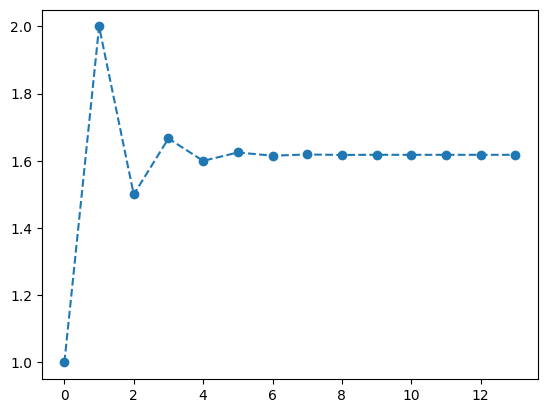

In [7]:
# Secuencia de Fibonacci
n = 300
a, b = 1, 1
x = [1]
while a < n:
    print(a, end=',')
    a, b = b, a+b
    x.append(b/a)

golden_ratio = (1 + np.sqrt(5))/2
print('\nGolden ratio : {:.55f}'.format(golden_ratio))
print('Secuencia xn : {:.55f}'.format(x[-1]))
Ea = np.fabs(golden_ratio - x[-1])
Er = np.fabs(golden_ratio - x[-1]) / np.fabs(golden_ratio)
print('Error absoluto : {:.55f}'.format(Ea))
print('Error relativo : {:.55f}'.format(Er))

plt.plot(x, 'o--')
plt.show()